In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='kermany.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('kermany.zip')
f.keys()
!unzip "kermany"

Streaming output truncated to the last 5000 lines.
  inflating: kermany/train/NORMAL/NORMAL-8050269-6_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8050269-7_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8050269-8_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8050636-1_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8050636-2_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055145-1_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055145-2_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055145-3_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055590-1_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055590-2_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8055590-3_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8056259-1_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8056259-2_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8056259-3_aug_0.jpg  
  inflating: kermany/train/NORMAL/NORMAL-8056259-4_aug_0.jpg  
  in

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf

# Define the batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (224, 224)  # Change this to your desired image size

# Directory where your dataset is located (replace with your actual path)
dataset_directory = '/content/kermany/train'
test_dataset = '/content/kermany/test'


# Create a training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    #validation_split=0.2,  # Specify the validation split here
    #subset="training",
    seed = 66 # This creates the training dataset
)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dataset,
                                                                 shuffle=True,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMG_SIZE)


Found 83484 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


In [ ]:

dataset = '/content/kermany/val'

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

validation_dataset = tf.keras.utils.image_dataset_from_directory(dataset,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE,
                                                                 seed=66)

Found 32 files belonging to 4 classes.


In [ ]:
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [ ]:
base_model = keras.applications.ResNet50V2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

94668760/94668760 [==============================] - 4s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
base_model.trainable = True

In [ ]:
set_trainable = False

for layer in base_model.layers:
  if layer.name == 'conv5_block1_preact_bn':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in base_model.layers:
  print(layer.name, " == ", layer.trainable)

input_3  ==  False
conv1_pad  ==  False
conv1_conv  ==  False
pool1_pad  ==  False
pool1_pool  ==  False
conv2_block1_preact_bn  ==  False
conv2_block1_preact_relu  ==  False
conv2_block1_1_conv  ==  False
conv2_block1_1_bn  ==  False
conv2_block1_1_relu  ==  False
conv2_block1_2_pad  ==  False
conv2_block1_2_conv  ==  False
conv2_block1_2_bn  ==  False
conv2_block1_2_relu  ==  False
conv2_block1_0_conv  ==  False
conv2_block1_3_conv  ==  False
conv2_block1_out  ==  False
conv2_block2_preact_bn  ==  False
conv2_block2_preact_relu  ==  False
conv2_block2_1_conv  ==  False
conv2_block2_1_bn  ==  False
conv2_block2_1_relu  ==  False
conv2_block2_2_pad  ==  False
conv2_block2_2_conv  ==  False
conv2_block2_2_bn  ==  False
conv2_block2_2_relu  ==  False
conv2_block2_3_conv  ==  False
conv2_block2_out  ==  False
conv2_block3_preact_bn  ==  False
conv2_block3_preact_relu  ==  False
conv2_block3_1_conv  ==  False
conv2_block3_1_bn  ==  False
conv2_block3_1_relu  ==  False
conv2_block3_2_pad  =

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                         

In [ ]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_ds,epochs=100,validation_data=validation_ds,callbacks=[early_stopping])

Epoch 1/100
2609/2609 [==============================] - 351s 131ms/step - loss: 0.3962 - accuracy: 0.8868 - val_loss: 0.1908 - val_accuracy: 0.9062
Epoch 2/100
2609/2609 [==============================] - 339s 130ms/step - loss: 0.2359 - accuracy: 0.9261 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 3/100
2609/2609 [==============================] - 337s 129ms/step - loss: 0.1882 - accuracy: 0.9404 - val_loss: 0.0595 - val_accuracy: 0.9688
Epoch 4/100
2609/2609 [==============================] - 337s 129ms/step - loss: 0.1572 - accuracy: 0.9508 - val_loss: 0.1038 - val_accuracy: 0.9688
Epoch 5/100
2609/2609 [==============================] - 338s 130ms/step - loss: 0.1305 - accuracy: 0.9595 - val_loss: 0.1560 - val_accuracy: 0.9688
Epoch 6/100
2609/2609 [==============================] - 338s 130ms/step - loss: 0.1084 - accuracy: 0.9669 - val_loss: 0.0494 - val_accuracy: 0.9688
Epoch 7/100
2609/2609 [==============================] - 338s 129ms/step - loss: 0.0887 - accuracy: 0.9728

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


31/31 [==============================] - 5s 128ms/step - loss: 1740190.7500 - accuracy: 0.2500
Test Loss: 1740190.7500
Test Accuracy: 0.2500


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_ds = train_dataset.map(process)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


31/31 [==============================] - 3s 85ms/step - loss: 1740190.5000 - accuracy: 0.2500
Test Loss: 1740190.5000
Test Accuracy: 0.2500


In [ ]:
class_names = validation_dataset.class_names

1/1 [==============================] - 0s 28ms/step


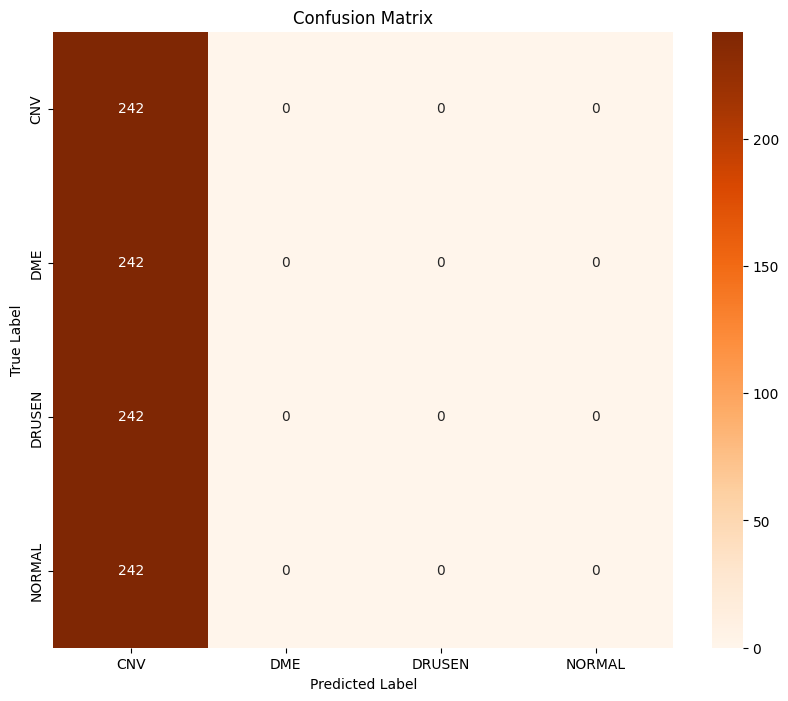

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace 'Class 0' and 'Class 1' with the actual class names from your dataset
#class_names = test_dataset.class_names

# Create empty arrays to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to obtain true and predicted labels
for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='d', xticklabels=class_names, yticklabels=class_names)

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

1/1 [==============================] - 0s 33ms/step
F1 Score: 0.1
Precision: 0.0625
Recall: 0.25
ROC-AUC Score: 0.5
Class 0 - Precision: 0.25, Recall: 1.0, F1-Score: 0.4, ROC-AUC: 0.5
Class 1 - Precision: 0.0, Recall: 0.0, F1-Score: 0.0, ROC-AUC: 0.5
Class 2 - Precision: 0.0, Recall: 0.0, F1-Score: 0.0, ROC-AUC: 0.5
Class 3 - Precision: 0.0, Recall: 0.0, F1-Score: 0.0, ROC-AUC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


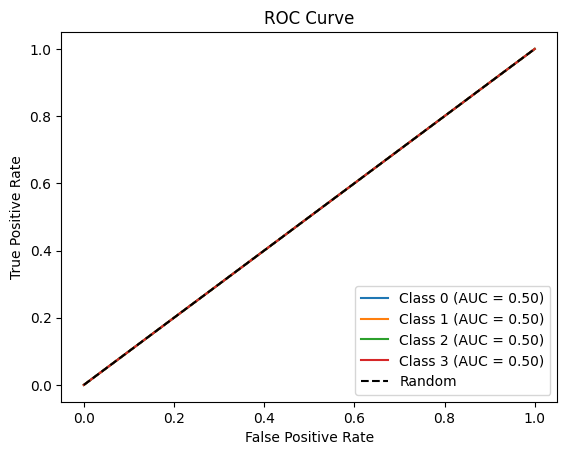

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a validation_dataset
test_dataset = test_dataset.unbatch().batch(1)  # Batch size = 1 for individual predictions

y_true = []
y_pred = []

for x_val, y_val in test_dataset:
    y_true.append(y_val.numpy()[0])  # Append true labels
    y_pred.append(model.predict(x_val)[0])  # Append predicted probabilities (raw output)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC Score: {roc_auc}")

# Calculate precision, recall, F1-score, and ROC-AUC score for each class
precision_per_class = precision_score(y_true, y_pred_classes, average=None)
recall_per_class = recall_score(y_true, y_pred_classes, average=None)
f1_per_class = f1_score(y_true, y_pred_classes, average=None)

roc_auc_per_class = []
for i in range(y_pred.shape[1]):
    roc_auc_per_class.append(roc_auc_score(y_true == i, y_pred[:, i]))

# Print metrics for each class
for i in range(y_pred.shape[1]):
    print(f"Class {i} - Precision: {precision_per_class[i]}, Recall: {recall_per_class[i]}, F1-Score: {f1_per_class[i]}, ROC-AUC: {roc_auc_per_class[i]}")

# Plot ROC curves
plt.figure()
for i in range(y_pred.shape[1]):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
